In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [43]:
dataset = pd.read_csv('news/train.csv')
dataset = dataset.dropna()
dataset.reset_index(inplace=True)

In [44]:
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,5]

In [45]:
X

,index,id,title,author
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy
...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary


In [46]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [47]:
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(X)):
    
    review = re.sub('[^a-zA-Z]', ' ', X['title'][i]).lower().split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [48]:
vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = vectorizer.fit_transform(corpus).toarray()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [51]:
vectorizer.get_feature_names_out()[:20]

array(['abandon', 'abandoned', 'abc', 'abc news', 'abe', 'abedin', 'able',
       'abortion', 'abroad', 'absolutely', 'absurd', 'abuse', 'abuse new',
       'abuse new york', 'academy', 'accept', 'accepting', 'access',
       'access pipeline', 'access pipeline protest'], dtype=object)

In [52]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [53]:
count_df = pd.DataFrame(X_train, columns=vectorizer.get_feature_names_out())

In [54]:
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
model = MultinomialNB()

accuracy:   0.898
Confusion matrix, without normalization


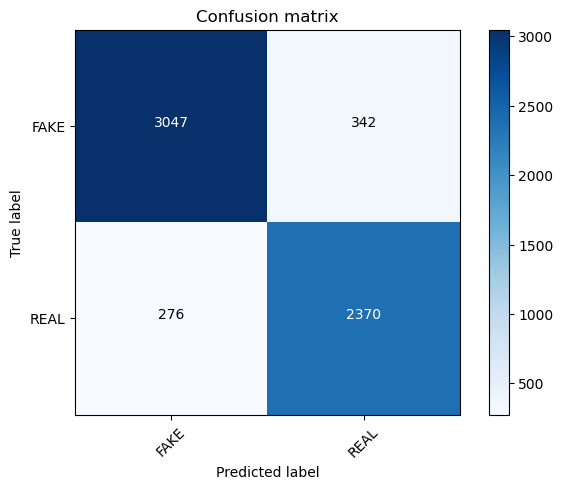

In [61]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [62]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8975973487986744

In [67]:
classifier = PassiveAggressiveClassifier(C = 0.5, random_state = 5)

accuracy:   0.917
Confusion matrix, without normalization


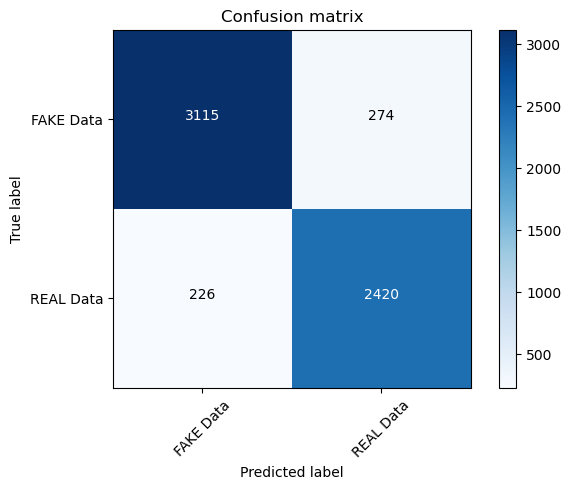

In [69]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])